# Evaluate Data

In [1]:
import LoadData
import numpy as np
import pandas as pd
import tensorflow as tf
import EvaluationFunctions

2025-02-28 12:29:54.534885: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-28 12:29:54.548895: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740745794.565716   63081 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740745794.569155   63081 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 12:29:54.586401: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Load the Model

In [2]:
model_name = "SiameseModel"
model_path = "./log/SiameseModel.keras"

# Load the model
model = tf.keras.models.load_model(model_path)

2025-02-28 12:29:57.527937: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-02-28 12:29:57.528000: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: chuongg3-XPS-15-9520
2025-02-28 12:29:57.528020: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: chuongg3-XPS-15-9520
2025-02-28 12:29:57.528134: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 550.120.0
2025-02-28 12:29:57.528206: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 550.120.0
2025-02-28 12:29:57.528249: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 550.120.0
/home/chuongg3/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProg

## Evaluate Model's Performance

In [3]:
test_path = "./data/.temp/test.db"
batch_size = 32
sample_limit = 1000

### All Data Performance

#### Get Test Metrics

In [4]:
AllDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'All-Testing')
metric = model.evaluate(AllDataLoader)
print(metric)

Train.py PID: 63081
[main] Processing batch in thread id: 123584955549248
['./data/.temp/test_0.npz', './data/.temp/test_1.npz'] files found ...
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 63234
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 63234
      1/Unknown 11s 11s/step - loss: 7.3369e-04 - mae: 0.0172 - mape: 68.7500 - mse: 7.3369e-04

I0000 00:00:1740745812.042855   63197 service.cc:148] XLA service 0x7065d4008e00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740745812.042892   63197 service.cc:156]   StreamExecutor device (0): Host, Default Version
2025-02-28 12:30:12.060376: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740745812.173922   63197 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  20459/Unknown 72s 3ms/step - loss: 0.0070 - mae: 0.0291 - mape: 896672.6250 - mse: 0.0070
Size of dataset (All-Testing): 654897
20465/20465 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - loss: 0.0070 - mae: 0.0291 - mape: 896694.5000 - mse: 0.0070
[0.007073812652379274, 0.007073812652379274, 0.029123567044734955, 960478.5]


/home/chuongg3/.local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
2025-02-28 12:31:13.386363: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


#### Get True vs Predicted Graph

In [5]:
AllDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'All-Testing')
y_pred = model.predict(AllDataLoader)

Train.py PID: 62032
[main] Processing batch in thread id: 126885570807360
['./data/.temp/test_0.npz', './data/.temp/test_1.npz'] files found ...
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 62361
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 62361
  20445/Unknown 63s 3ms/step
Size of dataset (<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 300), dtype=tf.float32, name=None), TensorSpec(shape=(None, 300), dtype=tf.float32, name=None)), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>): 654897
20465/20465 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step


2025-02-28 12:18:34.317356: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
AllDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'All-Testing')
y_true = np.concatenate([labels for _, labels in AllDataLoader.as_numpy_iterator()])

Train.py PID: 62032
[main] Processing batch in thread id: 126884606117440
['./data/.temp/test_0.npz', './data/.temp/test_1.npz'] files found ...
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 62410
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 62410

Size of dataset (<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 300), dtype=tf.float32, name=None), TensorSpec(shape=(None, 300), dtype=tf.float32, name=None)), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>): 654897


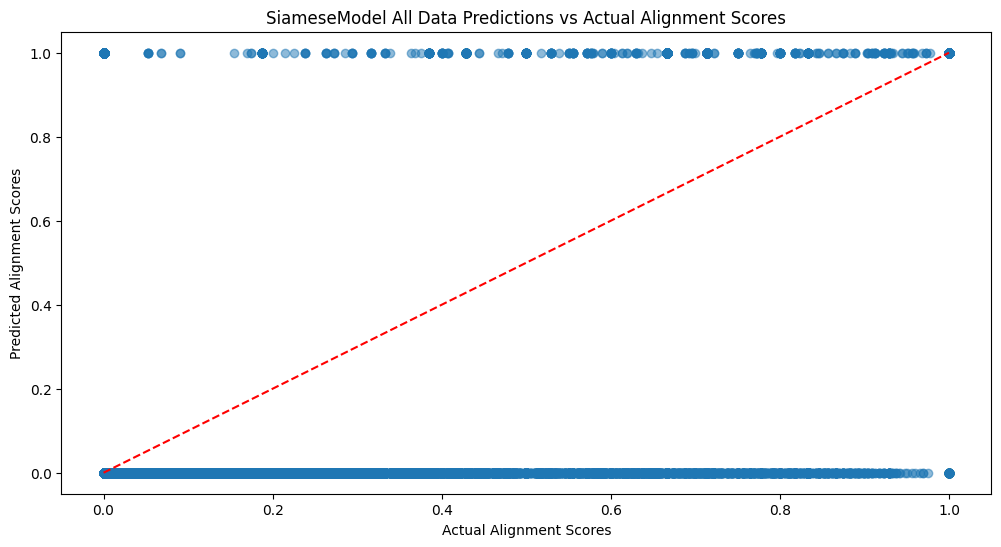

In [7]:
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} All Data")

### Non-Zero Data Performance

#### Get Test Metrics

In [8]:
NonZeroDataLoader = LoadData.LoadSQLDataset(test_path, batch_size, 'WHERE AlignmentScore != 0')
metric = model.evaluate(NonZeroDataLoader)
print(metric)

Start of WHERE AlignmentScore != 0 dataset
  10226/Unknown 39s 4ms/step - loss: 0.0122 - mae: 0.0564 - mape: 98.9365 - mse: 0.0122
Size of dataset (WHERE AlignmentScore != 0): 327450
10233/10233 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.0122 - mae: 0.0564 - mape: 98.9365 - mse: 0.0122
[0.012226770631968975, 0.012226770631968975, 0.05632641911506653, 98.93628692626953]


2025-02-28 12:19:41.146509: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


#### Get True vs Predicted Graph

In [9]:
NonZeroDataLoader = LoadData.LoadSQLDataset(test_path, batch_size, 'WHERE AlignmentScore != 0')
y_pred = model.predict(NonZeroDataLoader)

Start of WHERE AlignmentScore != 0 dataset
  10223/Unknown 37s 4ms/step
Size of dataset (WHERE AlignmentScore != 0): 327450
10233/10233 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step


In [10]:
NonZeroDataLoader = LoadData.LoadSQLDataset(test_path, batch_size, 'WHERE AlignmentScore != 0')
y_true = np.concatenate([labels for _, labels in NonZeroDataLoader.as_numpy_iterator()])

Start of WHERE AlignmentScore != 0 dataset

Size of dataset (WHERE AlignmentScore != 0): 327450


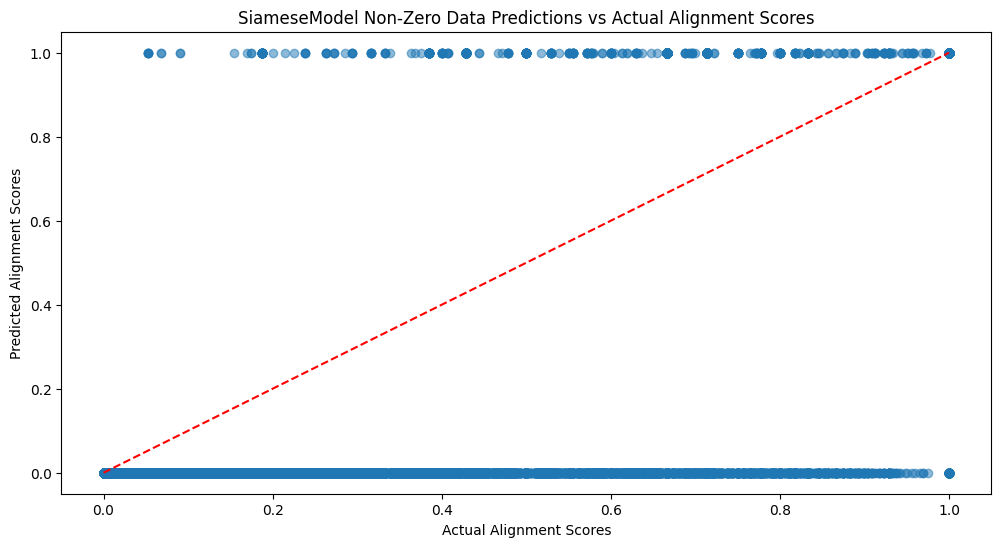

In [11]:
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} Non-Zero Data")

### Zero Data Performance

#### Get Test Metrics

In [12]:
ZeroDataLoader = LoadData.LoadSQLDataset(test_path, batch_size, 'WHERE AlignmentScore == 0')
metric = model.evaluate(NonZeroDataLoader)
print(metric)

Start of WHERE AlignmentScore != 0 dataset
  10230/Unknown 39s 4ms/step - loss: 0.0122 - mae: 0.0564 - mape: 98.9365 - mse: 0.0122
Size of dataset (WHERE AlignmentScore != 0): 327450
10233/10233 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.0122 - mae: 0.0564 - mape: 98.9365 - mse: 0.0122
[0.012226770631968975, 0.012226770631968975, 0.05632641911506653, 98.93628692626953]


#### Get True vs Predicted Graph

In [13]:
ZeroDataLoader = LoadData.LoadSQLDataset(test_path, batch_size, 'WHERE AlignmentScore == 0')
y_pred = model.predict(ZeroDataLoader)

Start of WHERE AlignmentScore == 0 dataset
  10223/Unknown 32s 3ms/step
Size of dataset (WHERE AlignmentScore == 0): 327447
10233/10233 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step


2025-02-28 12:21:52.491667: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [14]:
ZeroDataLoader = LoadData.LoadSQLDataset(test_path, batch_size, 'WHERE AlignmentScore == 0')
y_true = np.concatenate([labels for _, labels in ZeroDataLoader.as_numpy_iterator()])

Start of WHERE AlignmentScore == 0 dataset

Size of dataset (WHERE AlignmentScore == 0): 327447


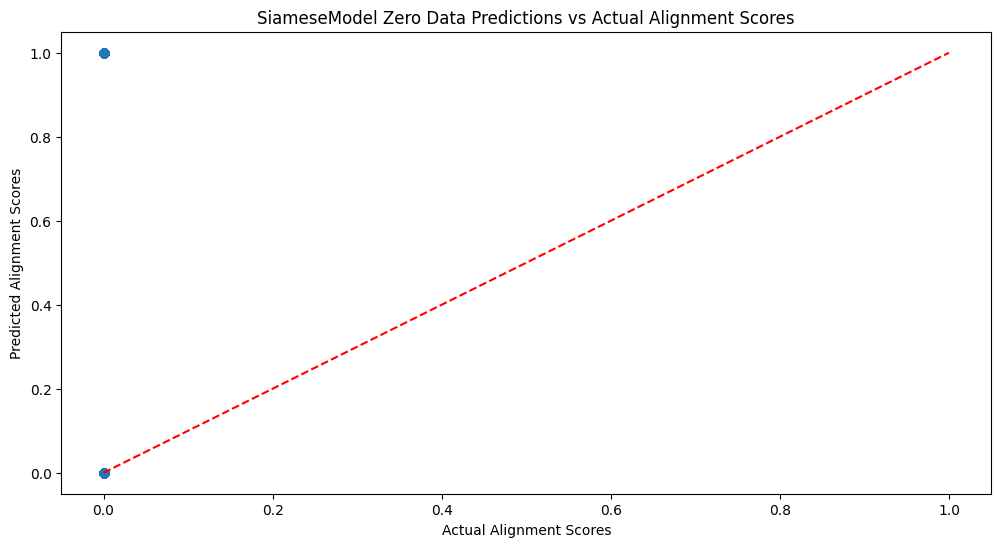

In [15]:
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} Zero Data")

### Non-Zero and Non-One Data Performance

#### Get Test Metrics

In [16]:
NonZeroNonOneDataLoader = LoadData.LoadSQLDataset(test_path, batch_size, 'WHERE AlignmentScore != 0 AND AlignmentScore != 1')
metric = model.evaluate(NonZeroNonOneDataLoader)
print(metric)

Start of WHERE AlignmentScore != 0 AND AlignmentScore != 1 dataset
  10113/Unknown 37s 4ms/step - loss: 0.0121 - mae: 0.0567 - mape: 99.9833 - mse: 0.0121
Size of dataset (WHERE AlignmentScore != 0 AND AlignmentScore != 1): 323974
10125/10125 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 0.0121 - mae: 0.0567 - mape: 99.9833 - mse: 0.0121
[0.012144971638917923, 0.012144971638917923, 0.05671774968504906, 99.97647857666016]


#### Get True vs Predicted Graph

In [17]:
NonZeroNonOneDataLoader = LoadData.LoadSQLDataset(test_path, batch_size, 'WHERE AlignmentScore != 0 AND AlignmentScore != 1')
y_pred = model.predict(NonZeroNonOneDataLoader)

Start of WHERE AlignmentScore != 0 AND AlignmentScore != 1 dataset
  10116/Unknown 33s 3ms/step
Size of dataset (WHERE AlignmentScore != 0 AND AlignmentScore != 1): 323974
10125/10125 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step


In [18]:
NonZeroNonOneDataLoader = LoadData.LoadSQLDataset(test_path, batch_size, 'WHERE AlignmentScore != 0 AND AlignmentScore != 1')
y_true = np.concatenate([labels for _, labels in NonZeroNonOneDataLoader.as_numpy_iterator()])

Start of WHERE AlignmentScore != 0 AND AlignmentScore != 1 dataset

Size of dataset (WHERE AlignmentScore != 0 AND AlignmentScore != 1): 323974


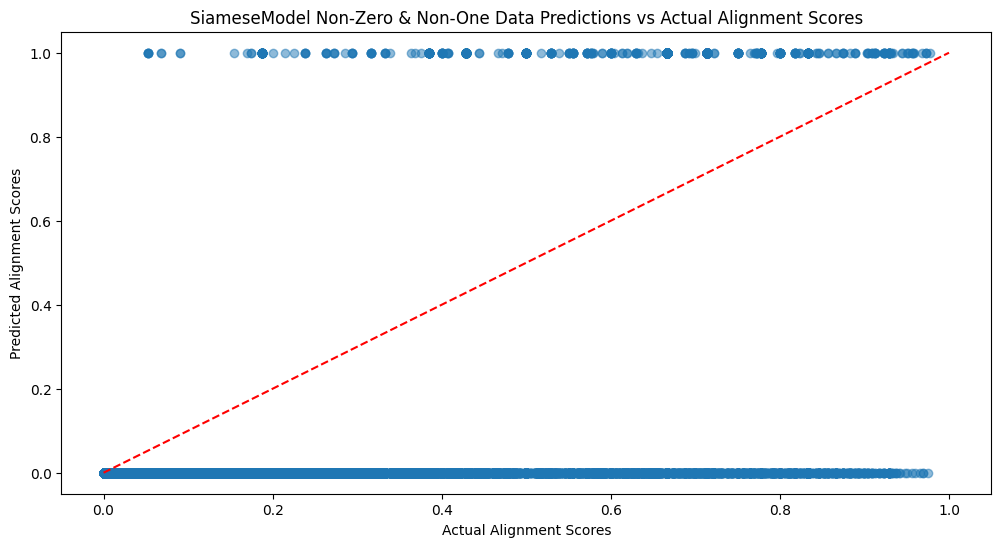

In [19]:
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} Non-Zero & Non-One Data")

In [20]:
np.unique(y_true, return_counts=True)

(array([6.9949638e-05, 7.0101647e-05, 7.0113936e-05, ..., 9.7333336e-01,
        9.7474748e-01, 9.7802198e-01], dtype=float32),
 array([1, 1, 1, ..., 3, 1, 1]))

In [21]:
np.unique(y_pred, return_counts=True)

(array([0.        , 0.9999937 , 0.99999475], dtype=float32),
 array([323053,      1,    920]))

In [22]:
number = 9.7802198e-01
print(f"{number:.8f}")

0.97802198
